#**Judul: Analisis Dampak Media Sosial Terhadap Kesehatan Mental Dalam Perspektif  Fuzzy**

## **Nama kelompok:**
### 1. Rizal Wahyu Pratama (2311110029)
### 2. Khulika Malkan (2311110057)

## **Pendahuluan**

## **1.1 Latar Belakang**

Kesehatan mental menjadi isu yang sedang marak diperbincangkan di dunia global. Meningkatnya pengguna media sosial berbanding lurus dengan meningkatnya kasus kesehatan mental. Dibeberapa kasus, pengguna media sosial merasa cemas, depresi, dan tidak puas terhadap diri sendiri. Interaksi yang terjadi di platform media sosial dapat memperburuk kondisi mental seseorang, dimana stigma buruk yang melekat pada kesehatan mental memperburuk kondisi seseorang yang ingin menceritakan keadaan mentalnya. Maka dibutuhkan pemahaman mengenai waktu yang dihabiskan di media sosial terhadap tingkat kecemasan seorang individu.



Statistik menunjukkan bahwa sekitar 1 dari 5 orang dewasa mengalami masalah kesehatan mental setiap tahun, dan angka ini terus meningkat. Menurut laporan dari WHO, lebih dari 264 juta orang di seluruh dunia menderita depresi, dan lebih dari 300 juta orang mengalami gangguan kecemasan [1]. Selain itu, penelitian menunjukkan bahwa individu yang menghabiskan lebih dari dua jam sehari di media sosial memiliki kemungkinan lebih tinggi untuk mengalami masalah kesehatan mental [2]. Dataset yang digunakan dalam analisis ini berasal dari platform kaggle yaitu dataset [Mental Health Trends in the Age of Social Media
](https://www.kaggle.com/code/syedanwarafridi/mental-health-trends-in-the-age-of-social-media) mencakup informasi mengenai waktu yang dihabiskan di media sosial dan tingkat kecemasan yang dialami oleh individu. Dataset ini diambil dari survei yang dilakukan di kalangan pengguna media sosial, yang mencakup berbagai demografi dan latar belakang, sehingga memberikan gambaran yang komprehensif mengenai dampak penggunaan media sosial terhadap kesehatan mental. Dengan menganalisis data ini, diharapkan dapat ditemukan pola dan hubungan yang dapat membantu dalam merumuskan strategi untuk meningkatkan kesehatan mental di era digital.

## **1.2 Pre-Processing Dataset**

In [ ]:
import pandas as pd

In [ ]:
smmh = pd.read_csv('/content/smmh.csv')
smmh.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


In [ ]:
smmh.shape

(481, 21)

In [ ]:
smmh.columns

Index(['Timestamp', '1. What is your age?', '2. Gender',
       '3. Relationship Status', '4. Occupation Status',
       '5. What type of organizations are you affiliated with?',
       '6. Do you use social media?',
       '7. What social media platforms do you commonly use?',
       '8. What is the average time you spend on social media every day?',
       '9. How often do you find yourself using Social media without a specific purpose?',
       '10. How often do you get distracted by Social media when you are busy doing something?',
       '11. Do you feel restless if you haven't used Social media in a while?',
       '12. On a scale of 1 to 5, how easily distracted are you?',
       '13. On a scale of 1 to 5, how much are you bothered by worries?',
       '14. Do you find it difficult to concentrate on things?',
       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
       '16. Following the previous question, 

In [ ]:
new_column_names = {
    'Timestamp': 'timestamp',
    '1. What is your age?': 'age',
    '2. Gender': 'gender',
    '3. Relationship Status': 'relationship_status',
    '4. Occupation Status': 'occupation_status',
    '5. What type of organizations are you affiliated with?': 'affiliated_organizations',
    '6. Do you use social media?': 'use_social_media',
    '7. What social media platforms do you commonly use?': 'social_media_platforms',
    '8. What is the average time you spend on social media every day?': 'daily_social_media_time',
    '9. How often do you find yourself using Social media without a specific purpose?': 'frequency_social_media_no_purpose',
    '10. How often do you get distracted by Social media when you are busy doing something?': 'attention_is_diverted',
    "11. Do you feel restless if you haven't used Social media in a while?": 'restless_without_social_media',
    '12. On a scale of 1 to 5, how easily distracted are you?': 'distractibility_scale',
    '13. On a scale of 1 to 5, how much are you bothered by worries?': 'worry_level_scale',
    '14. Do you find it difficult to concentrate on things?': 'difficulty_concentrating',
    '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?': 'compare_to_successful_people_scale',
    '16. Following the previous question, how do you feel about these comparisons, generally speaking?': 'feelings_about_comparisons',
    '17. How often do you look to seek validation from features of social media?': 'frequency_seeking_validation',
    '18. How often do you feel depressed or down?': 'frequency_feeling_depressed',
    '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?': 'interest_fluctuation_scale',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?': 'sleep_issues_scale',
}

smmh = smmh.rename(columns=new_column_names)

In [ ]:
smmh

,timestamp,age,gender,relationship_status,occupation_status,affiliated_organizations,use_social_media,social_media_platforms,daily_social_media_time,frequency_social_media_no_purpose,...,restless_without_social_media,distractibility_scale,worry_level_scale,difficulty_concentrating,compare_to_successful_people_scale,feelings_about_comparisons,frequency_seeking_validation,frequency_feeling_depressed,interest_fluctuation_scale,sleep_issues_scale
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5/21/2022 23:38:28,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,3,4,3,4,4,2,4,3,4,4
477,5/22/2022 0:01:05,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,...,2,3,4,4,4,2,4,4,4,1
478,5/22/2022 10:29:21,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,...,4,3,2,3,3,3,4,2,2,2
479,7/14/2022 19:33:47,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,...,2,3,3,2,2,3,4,4,5,4


In [ ]:
#mengubah kolom daily_social_media_time menjadi numerik
import numpy as np
def convert_time_to_numeric(time_str):
    if isinstance(time_str, str):
        if 'Less than an Hour' in time_str:
            return 0.5
        elif 'Between 1 and 2 hours' in time_str:
            return 1.5
        elif 'Between 2 and 3 hours' in time_str:
            return 2.5
        elif 'Between 3 and 4 hours' in time_str:
            return 3.5
        elif 'More than 5 hours' in time_str:
            return 5.5
        else:
            return np.nan
    else:
        return time_str

smmh['daily_social_media_time'] = smmh['daily_social_media_time'].apply(convert_time_to_numeric)

In [ ]:
smmh.isnull().sum()

,0
timestamp,0
age,0
gender,0
relationship_status,0
occupation_status,0
affiliated_organizations,30
use_social_media,0
social_media_platforms,0
daily_social_media_time,67
frequency_social_media_no_purpose,0


In [ ]:
mode_value_social_media_time = smmh['daily_social_media_time'].mode()[0]
smmh['daily_social_media_time'] = smmh['daily_social_media_time'].fillna(mode_value_social_media_time)

In [ ]:
smmh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   timestamp                           481 non-null    object 
 1   age                                 481 non-null    float64
 2   gender                              481 non-null    object 
 3   relationship_status                 481 non-null    object 
 4   occupation_status                   481 non-null    object 
 5   affiliated_organizations            451 non-null    object 
 6   use_social_media                    481 non-null    object 
 7   social_media_platforms              481 non-null    object 
 8   daily_social_media_time             481 non-null    float64
 9   frequency_social_media_no_purpose   481 non-null    int64  
 10  attention_is_diverted               481 non-null    int64  
 11  restless_without_social_media       481 non-n

In [ ]:
smmh.duplicated().sum()

0

In [ ]:
smmh.head(5)

,timestamp,age,gender,relationship_status,occupation_status,affiliated_organizations,use_social_media,social_media_platforms,daily_social_media_time,frequency_social_media_no_purpose,...,restless_without_social_media,distractibility_scale,worry_level_scale,difficulty_concentrating,compare_to_successful_people_scale,feelings_about_comparisons,frequency_seeking_validation,frequency_feeling_depressed,interest_fluctuation_scale,sleep_issues_scale
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",2.5,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",5.5,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",3.5,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",5.5,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",2.5,3,...,4,4,5,5,3,3,3,4,4,1


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

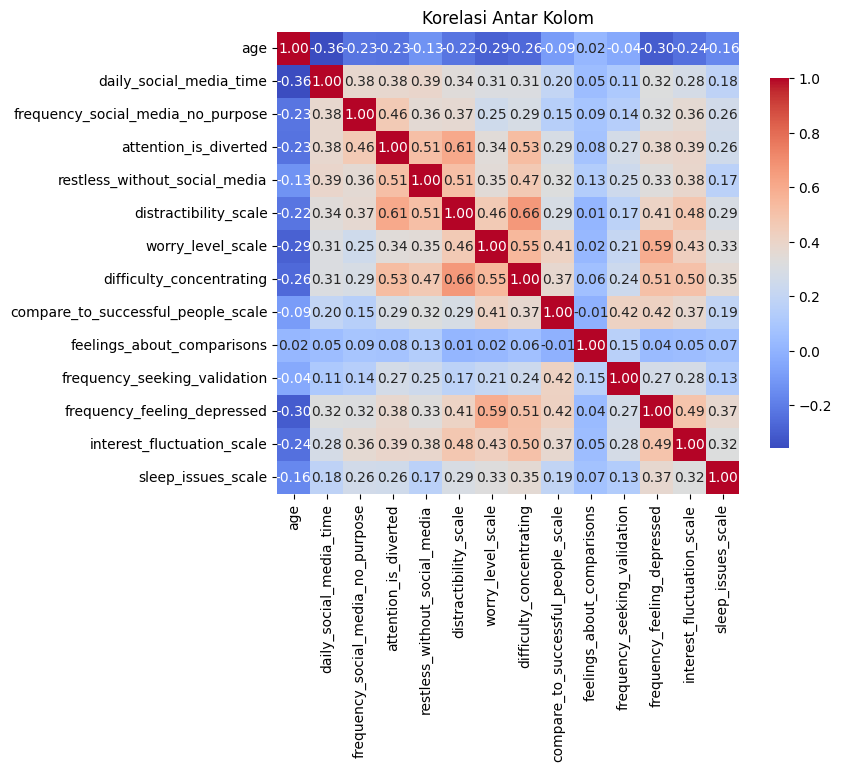

In [ ]:
correlation_matrix = smmh.corr(numeric_only=True)

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Korelasi Antar Kolom')
plt.show()

# **Metode**

## **2.1 Metode Pelaksanaan**

Dalam penelitian ini, kami menerapkan dua pendekatan sistem fuzzy, yaitu Fuzzy Mamdani dan Fuzzy Sugeno, untuk menganalisis dampak penggunaan media sosial terhadap kesehatan mental.

## **2.1.1 Fuzzy Mamdani**

Metode fuzzy mamdani ini digunakan untuk mengembangkan model fuzzy yang lebih intuitif dan mudah dipahami. Dalam pendekatan ini, kami mendefinisikan variabel input, yaitu waktu yang dihabiskan di media sosial dan tingkat kegelisahan tanpa media sosial. Setiap variabel input ini memiliki fungsi keanggotaan yang ditentukan berdasarkan rentang nilai yang relevan. Aturan fuzzy kemudian dirumuskan untuk menghubungkan input dengan output, yaitu tingkat kekhawatiran. Proses inferensi dilakukan dengan menggunakan metode Mamdani, di mana output dari setiap aturan fuzzy digabungkan untuk menghasilkan output akhir. Hasil akhir ini kemudian ditentukan dengan menggunakan defuzzifikasi untuk mendapatkan nilai numerik yang representatif dari tingkat kekhawatiran.

## **2.1.2 Fuzzy Sugeno**

Sebagai perbandingan, kami juga menerapkan metode Fuzzy Sugeno, yang lebih efisien dalam hal komputasi dan sering digunakan dalam aplikasi kontrol. Dalam pendekatan ini, kami juga mendefinisikan variabel input yang sama, tetapi output dari setiap aturan fuzzy adalah fungsi linear dari input. Dengan menggunakan metode Sugeno, kami dapat menghitung output secara langsung dari input yang diberikan, yang memungkinkan untuk analisis yang lebih cepat dan efisien. Proses ini melibatkan penentuan aturan fuzzy yang menghubungkan input dengan output, di mana setiap aturan memberikan kontribusi terhadap output akhir berdasarkan bobot yang ditentukan.

Dengan menerapkan kedua metode ini, kami dapat membandingkan efektivitas dan efisiensi masing-masing pendekatan dalam menganalisis dampak penggunaan media sosial terhadap kesehatan mental, serta memberikan wawasan yang lebih mendalam mengenai hubungan antara variabel-variabel tersebut. Hasil dari kedua metode ini diharapkan dapat memberikan rekomendasi yang lebih baik dalam upaya meningkatkan kesehatan mental di era digital.

# Hasil dan Analisis

## **3.1 Menggunakan Fuzzy Mamdani**

In [ ]:
pip install scikit-fuzzy

In [ ]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl


### **3.1.1 Nilai Linguistik**

Variabel Input:

- daily_social_media_time:
Nilai Linguistik: low, medium, high. Jumlah Nilai Linguistik: 3
- restless_without_social_media:
Nilai Linguistik: low, medium, high. Jumlah Nilai Linguistik: 3


Variabel Output:

- depression_level:
Nilai Linguistik: low, medium, high.
Jumlah Nilai Linguistik: 3

In [ ]:
# Input
daily_social_media_time = ctrl.Antecedent(np.arange(0, 5.5, 0.1), 'daily_social_media_time')
restless_without_social_media = ctrl.Antecedent(np.arange(1, 5, 0.1), 'restless_without_social_media')
# Output
depression_level = ctrl.Consequent(np.arange(0, 11, 1), 'depression_level')

### **3.1.2 Bentuk Fungsi Keanggotaan**

Fungsi Keanggotaan untuk daily_social_media_time:

- low: Segitiga dengan titik [0, 0.5, 2.5]
- medium: Segitiga dengan titik [1.5, 3.5, 5.5]
- high: Segitiga dengan titik [3.5, 5.5, 5.5]

Fungsi Keanggotaan untuk restless_without_social_media:

- low: Segitiga dengan titik [1, 1, 3]
- medium: Segitiga dengan titik [2, 3, 4]
- high: Segitiga dengan titik [3, 5, 5]

Fungsi Keanggotaan untuk depression_level:

- low: Segitiga dengan titik [0, 0, 5]
- medium: Segitiga dengan titik [0, 5, 10]
- high: Segitiga dengan titik [5, 10, 10]

### **3.1.3 Batas Nilai Linguistik**

Batas Nilai Linguistik untuk Setiap Variabel:

daily_social_media_time:
- low: 0 hingga 2.5
- medium: 1.5 hingga 5.5
- high: 3.5 hingga 5.5

restless_without_social_media:
- low: 1 hingga 3
- medium: 2 hingga 4
- high: 3 hingga 5

depression_level:
- low: 0 hingga 5
- medium: 0 hingga 10
- high: 5 hingga 10

In [ ]:
daily_social_media_time['low'] = fuzz.trimf(daily_social_media_time.universe, [0, 0.5, 2.5])
daily_social_media_time['medium'] = fuzz.trimf(daily_social_media_time.universe, [1.5, 3.5, 5.5])
daily_social_media_time['high'] = fuzz.trimf(daily_social_media_time.universe, [3.5, 5.5, 5.5])

restless_without_social_media['low'] = fuzz.trimf(restless_without_social_media.universe, [1, 1, 3])
restless_without_social_media['medium'] = fuzz.trimf(restless_without_social_media.universe, [2, 3, 4])
restless_without_social_media['high'] = fuzz.trimf(restless_without_social_media.universe, [3, 5, 5])

depression_level['low'] = fuzz.trimf(depression_level.universe, [0, 0, 5])
depression_level['medium'] = fuzz.trimf(depression_level.universe, [0, 5, 10])
depression_level['high'] = fuzz.trimf(depression_level.universe, [5, 10, 10])

### **3.1.4 Fuzzy Rule**

1. Jika daily_social_media_time adalah low dan restless_without_social_media adalah low, maka depression_level adalah low.
2. Jika daily_social_media_time adalah low dan restless_without_social_media adalah medium, maka depression_level adalah low.
3. Jika daily_social_media_time adalah low dan restless_without_social_media adalah high, maka depression_level adalah medium.
4. Jika daily_social_media_time adalah medium dan restless_without_social_media adalah low, maka depression_level adalah low.
5. Jika daily_social_media_time adalah medium dan restless_without_social_media adalah medium, maka depression_level adalah medium.
6. Jika daily_social_media_time adalah medium dan restless_without_social_media adalah high, maka depression_level adalah high.
7. Jika daily_social_media_time adalah high dan restless_without_social_media adalah low, maka depression_level adalah medium.
8. Jika daily_social_media_time adalah high dan restless_without_social_media adalah medium, maka depression_level adalah high.
9. Jika daily_social_media_time adalah high dan restless_without_social_media adalah high, maka depression_level adalah high.

In [ ]:
#menfinisikan aturan fuzzy
rule1 = ctrl.Rule(daily_social_media_time['low'] & restless_without_social_media['low'], depression_level['low'])
rule2 = ctrl.Rule(daily_social_media_time['low'] & restless_without_social_media['medium'], depression_level['low'])
rule3 = ctrl.Rule(daily_social_media_time['low'] & restless_without_social_media['high'], depression_level['medium'])

rule4 = ctrl.Rule(daily_social_media_time['medium'] & restless_without_social_media['low'], depression_level['low'])
rule5 = ctrl.Rule(daily_social_media_time['medium'] & restless_without_social_media['medium'], depression_level['medium'])
rule6 = ctrl.Rule(daily_social_media_time['medium'] & restless_without_social_media['high'], depression_level['high'])

rule7 = ctrl.Rule(daily_social_media_time['high'] & restless_without_social_media['low'], depression_level['medium'])
rule8 = ctrl.Rule(daily_social_media_time['high'] & restless_without_social_media['medium'], depression_level['high'])
rule9 = ctrl.Rule(daily_social_media_time['high'] & restless_without_social_media['high'], depression_level['high'])

In [ ]:
#membuat batasannya
depression_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
depression_simulation = ctrl.ControlSystemSimulation(depression_ctrl)

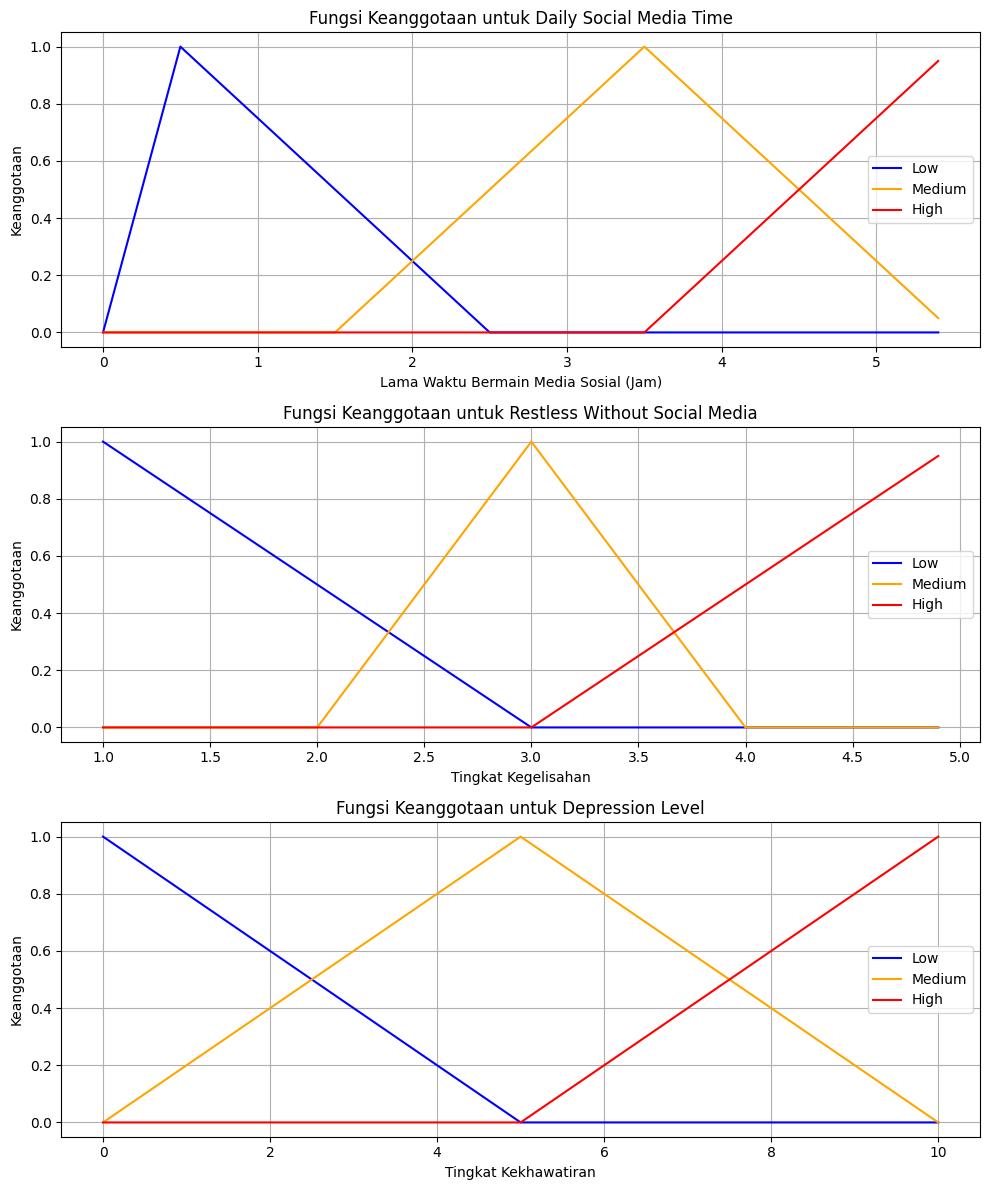

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

# Daily Social Media Time
ax[0].plot(daily_social_media_time.universe, daily_social_media_time['low'].mf, label='Low', color='blue')
ax[0].plot(daily_social_media_time.universe, daily_social_media_time['medium'].mf, label='Medium', color='orange')
ax[0].plot(daily_social_media_time.universe, daily_social_media_time['high'].mf, label='High', color='red')
ax[0].set_title('Fungsi Keanggotaan untuk Daily Social Media Time')
ax[0].set_xlabel('Lama Waktu Bermain Media Sosial (Jam)')
ax[0].set_ylabel('Keanggotaan')
ax[0].legend()
ax[0].grid()

# Restless Without Social Media
ax[1].plot(restless_without_social_media.universe, restless_without_social_media['low'].mf, label='Low', color='blue')
ax[1].plot(restless_without_social_media.universe, restless_without_social_media['medium'].mf, label='Medium', color='orange')
ax[1].plot(restless_without_social_media.universe, restless_without_social_media['high'].mf, label='High', color='red')
ax[1].set_title('Fungsi Keanggotaan untuk Restless Without Social Media')
ax[1].set_xlabel('Tingkat Kegelisahan')
ax[1].set_ylabel('Keanggotaan')
ax[1].legend()
ax[1].grid()

# Depression Level
ax[2].plot(depression_level.universe, depression_level['low'].mf, label='Low', color='blue')
ax[2].plot(depression_level.universe, depression_level['medium'].mf, label='Medium', color='orange')
ax[2].plot(depression_level.universe, depression_level['high'].mf, label='High', color='red')
ax[2].set_title('Fungsi Keanggotaan untuk Depression Level')
ax[2].set_xlabel('Tingkat Kekhawatiran')
ax[2].set_ylabel('Keanggotaan')
ax[2].legend()
ax[2].grid()

plt.tight_layout()
plt.show()

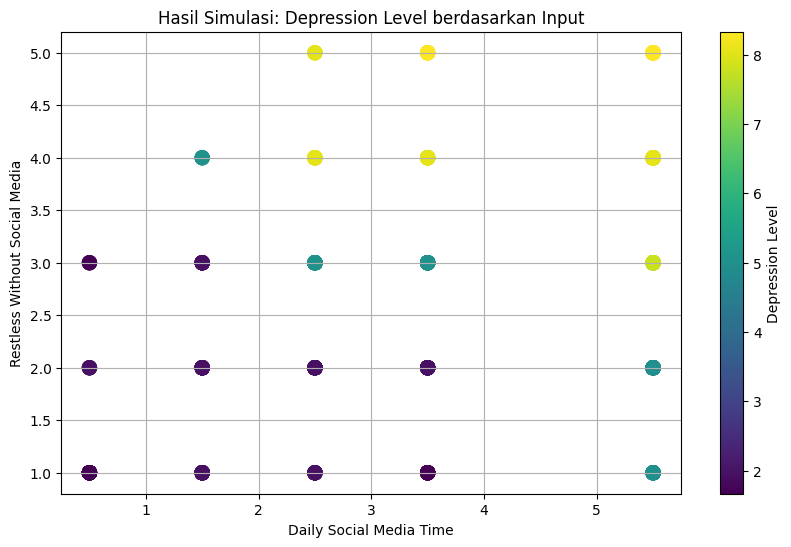

In [ ]:
results = []
for index, row in smmh.iterrows():
    daily_time_input = row['daily_social_media_time']
    restless_input = row['restless_without_social_media']

    # Mengisi input ke dalam simulasi
    depression_simulation.input['daily_social_media_time'] = daily_time_input
    depression_simulation.input['restless_without_social_media'] = restless_input

    # Menjalankan simulasi
    depression_simulation.compute()

    # Mengambil hasil output
    output_depression_level = depression_simulation.output['depression_level']
    results.append((daily_time_input, restless_input, output_depression_level))

# Visualisasi hasil
results_df = pd.DataFrame(results, columns=['Daily Social Media Time', 'Restless Without Social Media', 'depression Level'])

plt.figure(figsize=(10, 6))
plt.scatter(results_df['Daily Social Media Time'], results_df['Restless Without Social Media'], c=results_df['depression Level'], cmap='viridis', s=100)
plt.colorbar(label='Depression Level')
plt.title('Hasil Simulasi: Depression Level berdasarkan Input')
plt.xlabel('Daily Social Media Time')
plt.ylabel('Restless Without Social Media')
plt.grid()
plt.show()

Fuzzy Mamdani Depression Level Counts:
 depression Level
low       194
high      165
medium    122
Name: count, dtype: int64


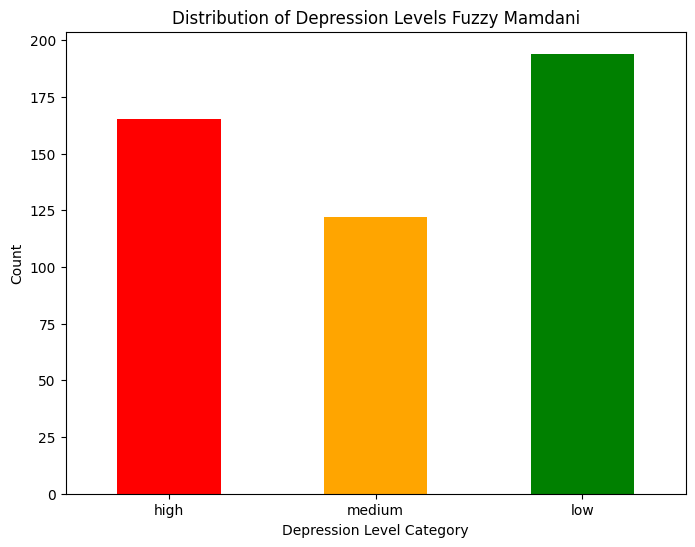

In [ ]:
# Menghitung jumlah kategori tingkat depresi
Depression_level_counts = results_df['depression Level'].apply(lambda x: 'low' if x <= 2.5 else ('medium' if x <= 7.5 else 'high')).value_counts()
print("Fuzzy Mamdani Depression Level Counts:\n", Depression_level_counts)

# Mengatur urutan kategori
Depression_level_counts = Depression_level_counts.reindex(['high', 'medium', 'low'])

# Plotting
plt.figure(figsize=(8, 6))
Depression_level_counts.plot(kind='bar', color=['red', 'orange', 'green'])
plt.title('Distribution of Depression Levels Fuzzy Mamdani')
plt.xlabel('Depression Level Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


Visualisasi di atas menunjukkan distribusi tingkat depresi berdasarkan hasil analisis menggunakan metode Fuzzy Mamdani. Diagram batang ini mengkategorikan tingkat depresi ke dalam tiga kategori: high, medium, dan low.

**Deskripsi**
1.   Tingkat Depresi Tinggi (High):

Kategori ini memiliki jumlah individu tertinggi, menunjukkan bahwa banyak responden mengalami tingkat depresi yang tinggi. Ini bisa menjadi indikasi bahwa faktor-faktor yang dianalisis (seperti waktu media sosial) mungkin berkontribusi signifikan terhadap kesehatan mental yang buruk.

2.   Tingkat Depresi Sedang (Medium):

Kategori ini menunjukkan jumlah individu yang lebih sedikit dibandingkan dengan kategori tinggi, tetapi masih signifikan. Ini menunjukkan bahwa ada sejumlah responden yang mengalami tingkat depresi sedang.

3.   Tingkat Depresi Rendah (Low):

Kategori ini memiliki jumlah individu terendah. Ini menunjukkan bahwa hanya sedikit responden yang melaporkan tingkat depresi yang rendah, yang bisa menjadi tanda positif dalam konteks kesehatan mental.

**Kesimpulan:**

Kesehatan Mental: Hasil ini menunjukkan bahwa mayoritas responden mengalami tingkat depresi yang rendah, yang merupakan indikasi positif bagi kesehatan mental populasi yang diteliti.

In [ ]:
# tabel hasil Mamdani
results_df = pd.DataFrame(results, columns=['Daily Social Media Time', 'Restless Without Social Media', 'depression Level'])

# Tampilkan tabel hasil Mamdani
print("Tabel Hasil Fuzzy Mamdani:")
results_df

Tabel Hasil Fuzzy Mamdani:


,Daily Social Media Time,Restless Without Social Media,depression Level
0,2.5,2,1.944444
1,5.5,2,4.969095
2,3.5,1,1.666667
3,5.5,1,4.976725
4,2.5,4,8.055556
...,...,...,...
476,2.5,3,5.000000
477,1.5,2,1.944444
478,2.5,4,8.055556
479,2.5,2,1.944444


### **3.2 Menggunakan Fuzzy Sugeno**

In [ ]:
!pip install -U scikit-fuzzy

## **1.2 Pre-Processing Dataset**
### membuat variabel baru atau dengan nama yang berbeda dari sebelumnya agar tidak keliru walaupun menggunakan data yang sama (smmh.csv)

In [ ]:
df = pd.read_csv('/content/smmh.csv')
df.head(5)

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


In [ ]:
new_column_names = {
    'Timestamp': 'timestamp',
    '1. What is your age?': 'age',
    '2. Gender': 'gender',
    '3. Relationship Status': 'relationship_status',
    '4. Occupation Status': 'occupation_status',
    '5. What type of organizations are you affiliated with?': 'affiliated_organizations',
    '6. Do you use social media?': 'use_social_media',
    '7. What social media platforms do you commonly use?': 'social_media_platforms',
    '8. What is the average time you spend on social media every day?': 'daily_social_media_time',
    '9. How often do you find yourself using Social media without a specific purpose?': 'frequency_social_media_no_purpose',
    '10. How often do you get distracted by Social media when you are busy doing something?': 'attention_is_diverted',
    "11. Do you feel restless if you haven't used Social media in a while?": 'restless_without_social_media',
    '12. On a scale of 1 to 5, how easily distracted are you?': 'distractibility_scale',
    '13. On a scale of 1 to 5, how much are you bothered by worries?': 'worry_level_scale',
    '14. Do you find it difficult to concentrate on things?': 'difficulty_concentrating',
    '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?': 'compare_to_successful_people_scale',
    '16. Following the previous question, how do you feel about these comparisons, generally speaking?': 'feelings_about_comparisons',
    '17. How often do you look to seek validation from features of social media?': 'frequency_seeking_validation',
    '18. How often do you feel depressed or down?': 'frequency_feeling_depressed',
    '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?': 'interest_fluctuation_scale',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?': 'sleep_issues_scale',
}

df = df.rename(columns=new_column_names)

In [ ]:
#mengubah kolom daily_social_media_time menjadi numerik
import numpy as np
def convert_time_to_numeric(time_str):
    if isinstance(time_str, str):
        if 'Less than an Hour' in time_str:
            return 0.5
        elif 'Between 1 and 2 hours' in time_str:
            return 1.5
        elif 'Between 2 and 3 hours' in time_str:
            return 2.5
        elif 'Between 3 and 4 hours' in time_str:
            return 3.5
        elif 'More than 5 hours' in time_str:
            return 5.5
        else:
            return np.nan
    else:
        return time_str

df['daily_social_media_time'] = df['daily_social_media_time'].apply(convert_time_to_numeric)

In [ ]:
mode_value_social_media_time = df['daily_social_media_time'].mode()[0]
df['daily_social_media_time'] = df['daily_social_media_time'].fillna(mode_value_social_media_time)


### **3.1.1 Nilai Linguistik**

Variabel Input:

- daily_social_media_time:
Nilai Linguistik: low, medium, high. Jumlah Nilai Linguistik: 3
- restless_without_social_media:
Nilai Linguistik: low, medium, high. Jumlah Nilai Linguistik: 3


Variabel Output:

- depression_level:
Nilai Linguistik: low, medium, high.
Jumlah Nilai Linguistik: 3

In [ ]:
# Input
social_media_time_input = ctrl.Antecedent(np.arange(0, 5.5, 0.1), 'daily_social_media_time')
restlessness_input = ctrl.Antecedent(np.arange(1, 5, 0.1), 'restless_without_social_media')
# Output
depression_output = ctrl.Consequent(np.arange(0, 11, 1), 'frequency_feeling_depressed')

### **3.1.2 Bentuk Fungsi Keanggotaan**

Fungsi Keanggotaan untuk daily_social_media_time:

- low: Segitiga dengan titik [0, 0.5, 2.5]
- medium: Segitiga dengan titik [1.5, 3.5, 5.5]
- high: Segitiga dengan titik [3.5, 5.5, 5.5]

Fungsi Keanggotaan untuk restless_without_social_media:

- low: Segitiga dengan titik [1, 1, 3]
- medium: Segitiga dengan titik [2, 3, 4]
- high: Segitiga dengan titik [3, 5, 5]

Fungsi Keanggotaan untuk depression_level:

- low: Segitiga dengan titik [0, 0, 5]
- medium: Segitiga dengan titik [0, 5, 10]
- high: Segitiga dengan titik [5, 10, 10]

### **3.1.3 Batas Nilai Linguistik**

Batas Nilai Linguistik untuk Setiap Variabel:

daily_social_media_time:
- low: 0 hingga 2.5
- medium: 1.5 hingga 5.5
- high: 3.5 hingga 5.5

restless_without_social_media:
- low: 1 hingga 3
- medium: 2 hingga 4
- high: 3 hingga 5

depression_level:
- low: 0 hingga 5
- medium: 0 hingga 10
- high: 5 hingga 10

In [ ]:
# Fungsi keanggotaan untuk input
social_media_time_input['low'] = fuzz.trimf(social_media_time_input.universe, [0, 0.5, 2.5])
social_media_time_input['medium'] = fuzz.trimf(social_media_time_input.universe, [1.5, 3.5, 5.5])
social_media_time_input['high'] = fuzz.trimf(social_media_time_input.universe, [3.5, 5.5, 5.5])

restlessness_input['low'] = fuzz.trimf(restlessness_input.universe, [1, 1, 3])
restlessness_input['medium'] = fuzz.trimf(restlessness_input.universe, [2, 3, 4])
restlessness_input['high'] = fuzz.trimf(restlessness_input.universe, [3, 5, 5])

In [ ]:
# Fungsi keanggotaan untuk output (singletons untuk Sugeno)
depression_output['low'] = fuzz.trimf(depression_output.universe, [0, 2, 4])
depression_output['medium'] = fuzz.trimf(depression_output.universe, [4, 6, 8])
depression_output['high'] = fuzz.trimf(depression_output.universe, [8, 10, 10])

### **3.1.4 Fuzzy Rule**

1. Jika daily_social_media_time adalah low dan restless_without_social_media adalah low, maka depression_level adalah low.
2. Jika daily_social_media_time adalah low dan restless_without_social_media adalah medium, maka depression_level adalah low.
3. Jika daily_social_media_time adalah low dan restless_without_social_media adalah high, maka depression_level adalah medium.
4. Jika daily_social_media_time adalah medium dan restless_without_social_media adalah low, maka depression_level adalah low.
5. Jika daily_social_media_time adalah medium dan restless_without_social_media adalah medium, maka depression_level adalah medium.
6. Jika daily_social_media_time adalah medium dan restless_without_social_media adalah high, maka depression_level adalah high.
7. Jika daily_social_media_time adalah high dan restless_without_social_media adalah low, maka depression_level adalah medium.
8. Jika daily_social_media_time adalah high dan restless_without_social_media adalah medium, maka depression_level adalah high.
9. Jika daily_social_media_time adalah high dan restless_without_social_media adalah high, maka depression_level adalah high.

In [ ]:
# Define fuzzy rules with Sugeno output using the defined singletons
rule1 = ctrl.Rule(social_media_time_input['low'] & restlessness_input['low'], depression_output['low'])
rule2 = ctrl.Rule(social_media_time_input['low'] & restlessness_input['medium'], depression_output['medium'])
rule3 = ctrl.Rule(social_media_time_input['low'] & restlessness_input['high'], depression_output['high'])

rule4 = ctrl.Rule(social_media_time_input['medium'] & restlessness_input['low'], depression_output['medium'])
rule5 = ctrl.Rule(social_media_time_input['medium'] & restlessness_input['medium'], depression_output['high'])
rule6 = ctrl.Rule(social_media_time_input['medium'] & restlessness_input['high'], depression_output['high'])

rule7 = ctrl.Rule(social_media_time_input['high'] & restlessness_input['low'], depression_output['high'])
rule8 = ctrl.Rule(social_media_time_input['high'] & restlessness_input['medium'], depression_output['high'])
rule9 = ctrl.Rule(social_media_time_input['high'] & restlessness_input['high'], depression_output['high'])

In [ ]:
# Control system and simulation
depression_control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
depression_simulation = ctrl.ControlSystemSimulation(depression_control_system)

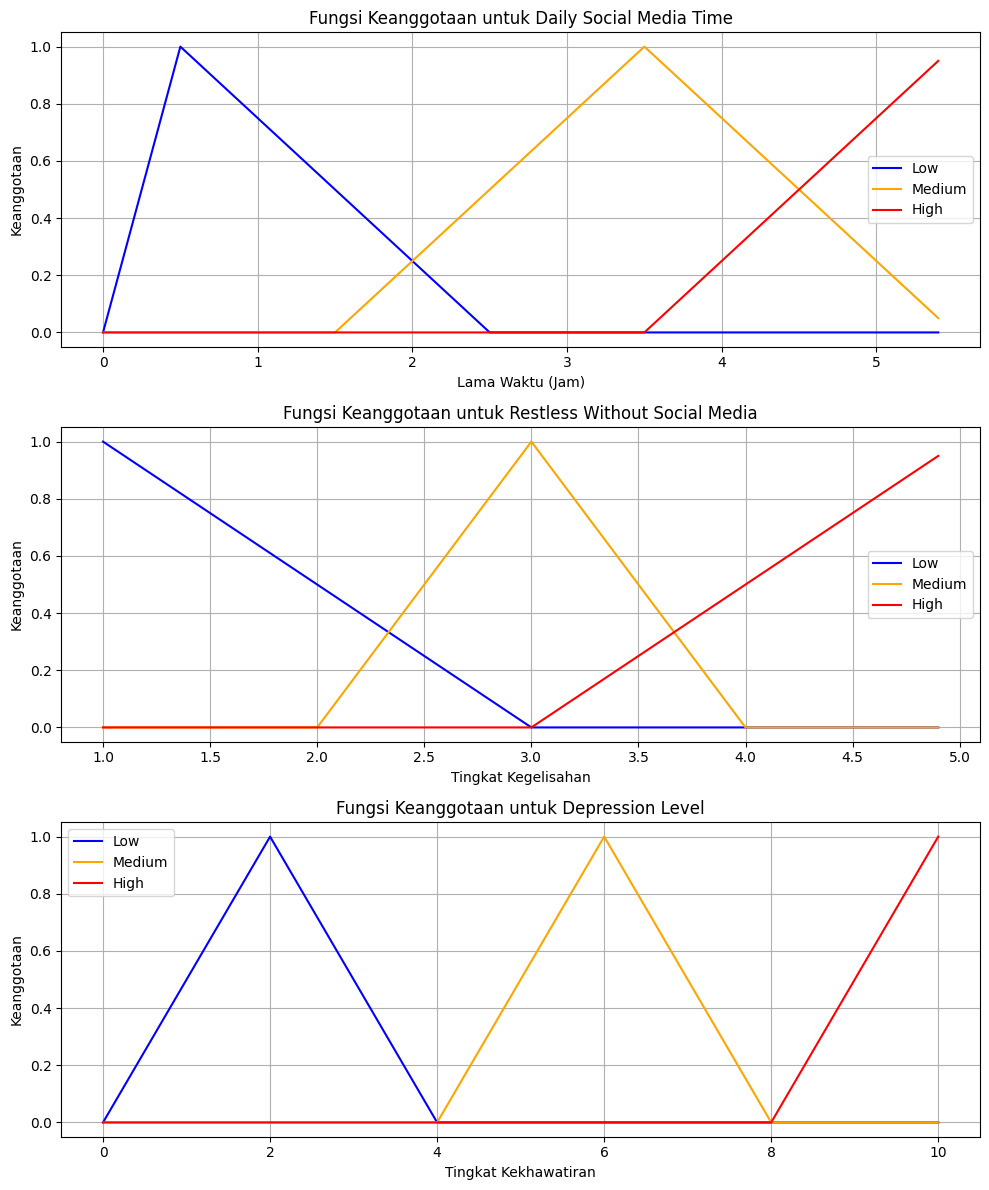

In [ ]:
# Visualisasi fungsi keanggotaan
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

# Daily Social Media Time
ax[0].plot(social_media_time_input.universe, social_media_time_input['low'].mf, label='Low', color='blue')
ax[0].plot(social_media_time_input.universe, social_media_time_input['medium'].mf, label='Medium', color='orange')
ax[0].plot(social_media_time_input.universe, social_media_time_input['high'].mf, label='High', color='red')
ax[0].set_title('Fungsi Keanggotaan untuk Daily Social Media Time')
ax[0].set_xlabel('Lama Waktu (Jam)')
ax[0].set_ylabel('Keanggotaan')
ax[0].legend()
ax[0].grid()

# Restless Without Social Media
ax[1].plot(restlessness_input.universe, restlessness_input['low'].mf, label='Low', color='blue')
ax[1].plot(restlessness_input.universe, restlessness_input['medium'].mf, label='Medium', color='orange')
ax[1].plot(restlessness_input.universe, restlessness_input['high'].mf, label='High', color='red')
ax[1].set_title('Fungsi Keanggotaan untuk Restless Without Social Media')
ax[1].set_xlabel('Tingkat Kegelisahan')
ax[1].set_ylabel('Keanggotaan')
ax[1].legend()
ax[1].grid()

# Depression Level
ax[2].plot(depression_output.universe, depression_output['low'].mf, label='Low', color='blue')
ax[2].plot(depression_output.universe, depression_output['medium'].mf, label='Medium', color='orange')
ax[2].plot(depression_output.universe, depression_output['high'].mf, label='High', color='red')
ax[2].set_title('Fungsi Keanggotaan untuk Depression Level')
ax[2].set_xlabel('Tingkat Kekhawatiran')
ax[2].set_ylabel('Keanggotaan')
ax[2].legend()
ax[2].grid()

plt.tight_layout()
plt.show()

In [ ]:
# Simulasi dengan data dari DataFrame df
results_sugeno = []
for index, row in df.iterrows():
    daily_time_input = float(row['daily_social_media_time'])
    restless_input = float(row['restless_without_social_media'])

    depression_simulation.input['daily_social_media_time'] = daily_time_input
    depression_simulation.input['restless_without_social_media'] = restless_input

    depression_simulation.compute()

    output_depression_level = depression_simulation.output['frequency_feeling_depressed']
    results_sugeno.append((daily_time_input, restless_input, output_depression_level))

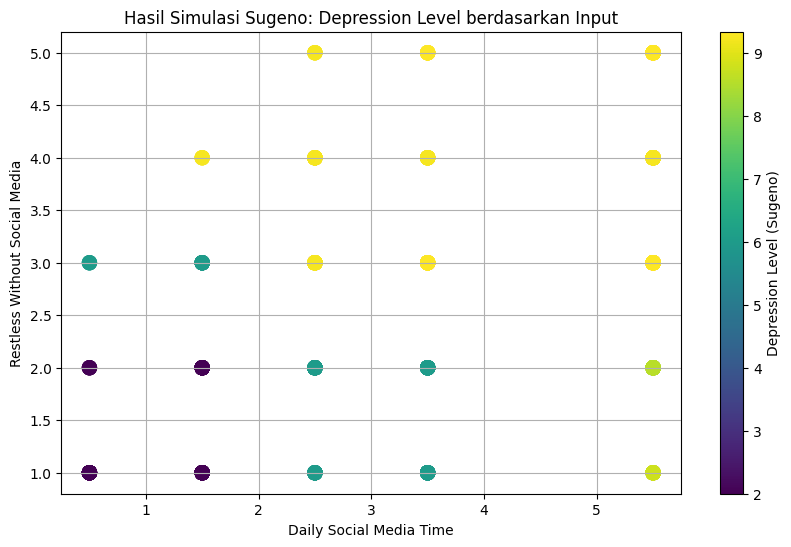

In [ ]:
# Visualisasi hasil
results_sugeno_df = pd.DataFrame(results_sugeno, columns=['Daily Social Media Time', 'Restless Without Social Media', 'Depression Level'])

plt.figure(figsize=(10, 6))
plt.scatter(results_sugeno_df['Daily Social Media Time'], results_sugeno_df['Restless Without Social Media'], c=results_sugeno_df['Depression Level'], cmap='viridis', s=100)
plt.colorbar(label='Depression Level (Sugeno)')
plt.title('Hasil Simulasi Sugeno: Depression Level berdasarkan Input')
plt.xlabel('Daily Social Media Time')
plt.ylabel('Restless Without Social Media')
plt.grid(True)
plt.show()

Sugeno Depression Level Counts:
 Depression Level
high      287
medium    110
low        84
Name: count, dtype: int64


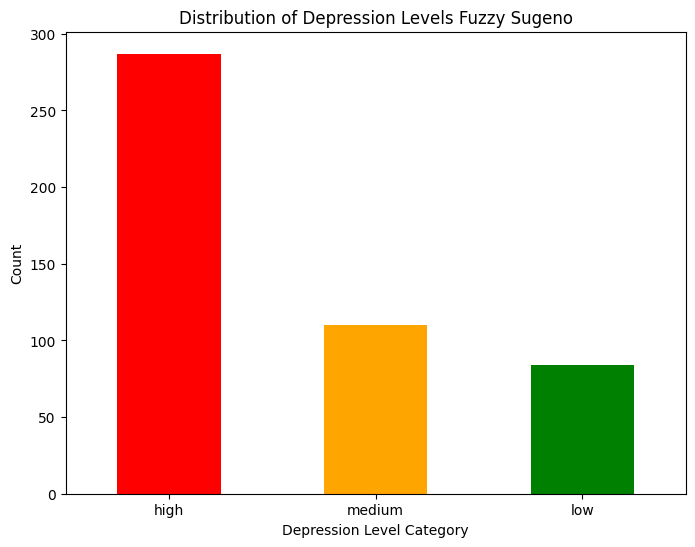

<Figure size 640x480 with 0 Axes>

In [ ]:
# Menghitung distribusi tingkat depresi
Depression_level_counts_sugeno = results_sugeno_df['Depression Level'].apply(lambda x: 'low' if x <= 2.5 else ('medium' if x <= 7.5 else 'high')).value_counts()
print("Sugeno Depression Level Counts:\n", Depression_level_counts_sugeno)

plt.figure(figsize=(8, 6))
Depression_level_counts_sugeno.plot(kind='bar', color=['red', 'orange', 'green'])
plt.title('Distribution of Depression Levels Fuzzy Sugeno')
plt.xlabel('Depression Level Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

plt.tight_layout()
plt.show()

Visualisasi di atas menunjukkan distribusi tingkat depresi berdasarkan hasil analisis menggunakan metode Fuzzy Sugeno. Diagram batang ini mengkategorikan tingkat depresi ke dalam tiga kategori: high, medium, dan low.

**Deskripsi:**



1.   Tingkat Depresi Tinggi (High):

Kategori ini memiliki jumlah individu tertinggi, menunjukkan bahwa banyak responden mengalami tingkat depresi yang tinggi. Ini menunjukkan bahwa faktor-faktor yang dianalisis (seperti waktu media sosial) mungkin berkontribusi signifikan terhadap kesehatan mental yang buruk.

2.   Tingkat Depresi Sedang (Medium):

Kategori ini menunjukkan jumlah individu yang lebih sedikit dibandingkan dengan kategori tinggi, tetapi masih signifikan. Ini menunjukkan bahwa ada sejumlah responden yang mengalami tingkat depresi sedang.

3.   Tingkat Depresi Rendah (Low):

Kategori ini memiliki jumlah individu terendah. Ini menunjukkan bahwa hanya sedikit responden yang melaporkan tingkat depresi yang rendah, yang bisa menjadi tanda positif dalam konteks kesehatan mental.

**Kesimpulan:**

Kesehatan Mental: Hasil ini menunjukkan bahwa mayoritas responden mengalami tingkat depresi yang tinggi, yang dapat menjadi perhatian serius bagi para profesional kesehatan mental.

In [ ]:
# Tabel hasil Sugeno
results_sugeno_df = pd.DataFrame(results_sugeno, columns=['Daily Social Media Time', 'Restless Without Social Media', 'Depression Level (Sugeno)'])

# Tampilkan tabel hasil Sugeno
print("Tabel Hasil Fuzzy Sugeno:")
results_sugeno_df

Tabel Hasil Fuzzy Sugeno:


,Daily Social Media Time,Restless Without Social Media,Depression Level (Sugeno)
0,2.5,2.0,6.000000
1,5.5,2.0,8.557319
2,3.5,1.0,6.000000
3,5.5,1.0,8.786932
4,2.5,4.0,9.222222
...,...,...,...
476,2.5,3.0,9.222222
477,1.5,2.0,2.000000
478,2.5,4.0,9.222222
479,2.5,2.0,6.000000


## **3.3 Perbandingan Metode antara Fuzzy Mamdani dan Fuzzy Sugeno**

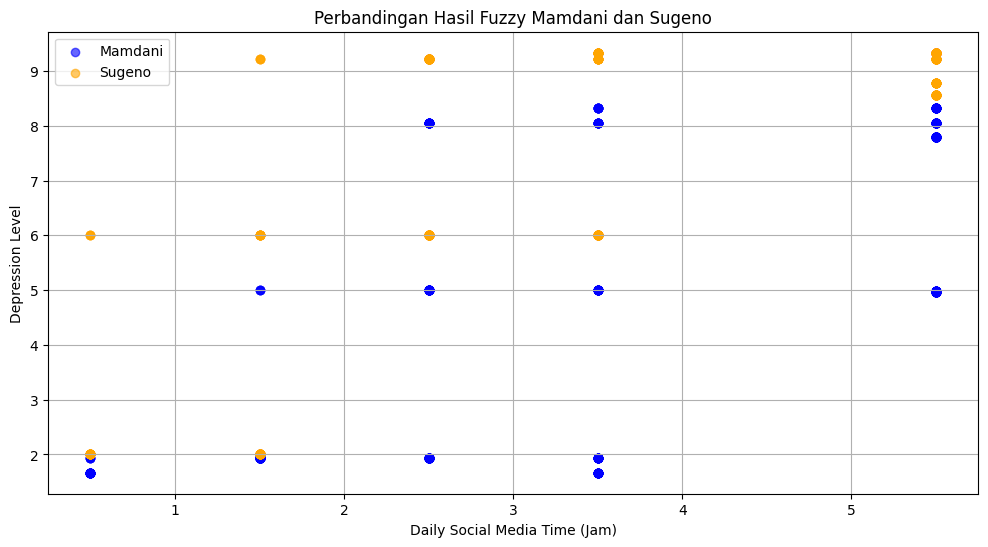

In [ ]:
# Visualisasi Perbandingan
plt.figure(figsize=(12, 6))

# Scatter plot untuk Mamdani
# Changed column name to 'depression Level'
plt.scatter(results_df['Daily Social Media Time'], results_df['depression Level'],
            color='blue', label='Mamdani', alpha=0.6)

# Scatter plot untuk Sugeno
plt.scatter(results_sugeno_df['Daily Social Media Time'], results_sugeno_df['Depression Level (Sugeno)'],
            color='orange', label='Sugeno', alpha=0.6)

plt.title('Perbandingan Hasil Fuzzy Mamdani dan Sugeno')
plt.xlabel('Daily Social Media Time (Jam)')
plt.ylabel('Depression Level')
plt.legend()
plt.grid(True)
plt.show()

Visualisasi di atas menunjukkan perbandingan hasil antara metode Fuzzy Mamdani dan Sugeno dalam konteks tingkat depresi berdasarkan waktu media sosial harian.

**1. Sumbu X:** Menunjukkan jumlah waktu yang dihabiskan di media sosial setiap hari (dalam jam).

**2. Sumbu Y:** Menunjukkan tingkat depresi yang diukur.

Deskripsi:
*   Titik Biru: Mewakili hasil dari metode Fuzzy Mamdani. Titik-titik ini menunjukkan variasi tingkat depresi yang dihasilkan berdasarkan waktu media sosial yang berbeda.
*   Titik Oranye: Mewakili hasil dari metode Fuzzy Sugeno. Titik-titik ini juga menunjukkan tingkat depresi.

**Analisis:**


*   **Korelasi Antara Waktu Media Sosial dan Tingkat Depresi::** Dari grafik, terlihat bahwa ada kecenderungan peningkatan tingkat depresi seiring dengan bertambahnya waktu yang dihabiskan di media sosial. Ini menunjukkan bahwa penggunaan media sosial yang berlebihan dapat berkontribusi pada peningkatan tingkat depresi di kalangan responden.

*   **Perbandingan Metode Mamdani dan Sugeno:** Hasil dari kedua metode menunjukkan pola yang serupa, tetapi ada perbedaan dalam nilai tingkat depresi yang dihasilkan. Mamdani cenderung memberikan hasil yang lebih tinggi dalam beberapa kasus, yang mungkin mencerminkan kemampuan Mamdani untuk menangkap nuansa dalam data fuzzy dengan lebih baik.
Sugeno, meskipun lebih efisien, mungkin tidak menangkap kompleksitas hubungan antara variabel dengan cara yang sama seperti Mamdani.

**Kesimpulan:**

Meskipun Fuzzy Sugeno memiliki kelebihan dalam hal efisiensi dan kecepatan, Fuzzy Mamdani lebih unggul dalam konteks analisis kesehatan mental pada dataset ini karena kemampuannya untuk memberikan output fuzzy yang lebih kaya, fleksibilitas dalam fungsi keanggotaan, dan kemampuan untuk menangani data kualitatif dengan lebih baik.

# **Referensi**

[1] World Health Organization, "Depression and Other Common Mental Disorders: Global Health Estimates," 2017. [Online]. Available: https://www.who.int/mental_health/management/depression/prevalence_global_health_estimates/en/. [Accessed: 31-Oct-2023].

[2] Primack, B. A., Shensa, A., Sidani, J. E., et al., "Social Media Use and Perceived Social Isolation Among Young Adults in the U.S.," American Journal of Preventive Medicine, vol. 53, no. 1, pp. 1-8, 2017. DOI: 10.1016/j.amepre.2017.01.010. https://pubmed.ncbi.nlm.nih.gov/28279545/